In [1]:
import pandas as pd
import numpy as np
import random

import data_loader

In [2]:
reviews, num_vis = data_loader.get_iteractions(size=12000)

In [3]:
reviews.head()

,user_id,recipe_id,date,rating,review
730397,1533,46877,2005-01-05,5,Uncle Bill you are amazing and so are your coo...
435538,1533,14777,2002-07-25,5,"Well Bergy these were WONDERFUL, my husband an..."
712621,1533,45033,2003-09-21,5,"Hi Bev, This where great, They turned out perf..."
483437,1533,37252,2002-08-16,5,"Wow what a great easy recipe, the flavor was w..."
497013,1533,48475,2003-09-23,4,"This soup was very good, I do agree it needs a..."


In [4]:
train, valid, num_vis = data_loader.splitter(reviews)

In [5]:
train.head()

recipe_id,62,93,142,153,167,192,198,242,246,278,...,485077,487467,491833,494369,494972,499705,500210,501151,502269,502824
user_id,,,,,,,,,,,,,,,,,,,,,
1533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2022-04-10 17:05:29.572157: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-10 17:05:29.609971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:05:29.641497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:05:29.642146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

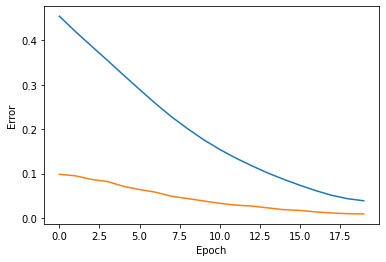

In [6]:
from rbm import RBM
model = RBM(128, num_vis)
model.fit(train, valid, 0.001, 20, 8)


In [7]:
model.write_recc_files()

2022-04-10 17:06:26.360721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:06:26.361002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:06:26.361194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:06:26.361442: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:06:26.361649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

### Predict reccomendations for all users

In [8]:
data = reviews.pivot(index='user_id', values='rating', columns='recipe_id').fillna(0)
recipe_ids = data.columns
user_ids = data.index
values = data.values
preds = model.predict(values)
recs = []
pred_scores = pd.DataFrame(preds, columns=recipe_ids, index=user_ids).T
for user_id in user_ids:
    user_pred = pred_scores[[user_id]].sort_values(user_id, ascending=False)
    recipes_rec = user_pred.index[:10]
    recs.append(recipes_rec)
reccomendations = pd.DataFrame(recs, columns=range(1, 11))
reccomendations['user_id'] = user_ids


2022-04-10 17:06:28.201013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:06:28.201197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:06:28.201305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:06:28.201452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 17:06:28.201567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

#### We now choose a sample user. Note that this user must be changed according to the data used.

In [130]:
recipes = pd.read_csv('recipes_enriched.csv')
reviews = pd.read_csv('Data/user_interactions.csv')

In [46]:
reviews[['user_id', 'rating']].groupby('user_id', as_index=False).size().sort_values('size', ascending=False).iloc[5:15]

,user_id,size
1772,53932,102
130,9869,101
1063,37779,96
313,17803,90
207,13483,85
1612,50969,83
1703,52543,83
734,29782,82
1483,47892,82
1534,49304,82


In [131]:
sample_user = 53932 # Change according to the data used

# Sample user must be set by uncommenting previous line before executing this.
reccomendations[reccomendations['user_id'] == sample_user].values[0]

array([ 49597,  77427, 274989, 254738, 263125, 113381,  84821, 123425,
        57059,  47913,  53932])

#### The reccomender has given new values that haven't been seen by the user yet

In [132]:
dishes = reccomendations[reccomendations['user_id'] == sample_user].values[0]
t = reviews[reviews['user_id'] == sample_user]
t[t['recipe_id'].isin(dishes) ]

,user_id,recipe_id,date,rating,review


In [133]:
import os
recipes_path = os.getcwd() + '/recipes_enriched.csv'
recipes = pd.read_csv(recipes_path)

In [134]:
left =  reviews[reviews['user_id'] == sample_user][['user_id', 'recipe_id']]
right = recipes[['id', 'cuisine']]

In [135]:

df = left.merge(right, left_on='recipe_id', right_on='id').groupby('cuisine', as_index=False).size().iloc[:10]

In [136]:
df

,cuisine,size
0,brazilian,3
1,british,28
2,cajun_creole,75
3,chinese,22
4,filipino,12
5,french,96
6,greek,73
7,indian,19
8,irish,31
9,italian,458


In [137]:
from mycolorpy import colorlist as mcp
color2=mcp.gen_color(cmap="hsv",n=len(df))

In [138]:
df['size'].values/2

array([  1.5,  14. ,  37.5,  11. ,   6. ,  48. ,  36.5,   9.5,  15.5,
       229. ])

        cuisine  size
0     brazilian     3
1       british    28
2  cajun_creole    75
3       chinese    22
4      filipino    12
5        french    96
6         greek    73
7        indian    19
8         irish    31
9       italian   458


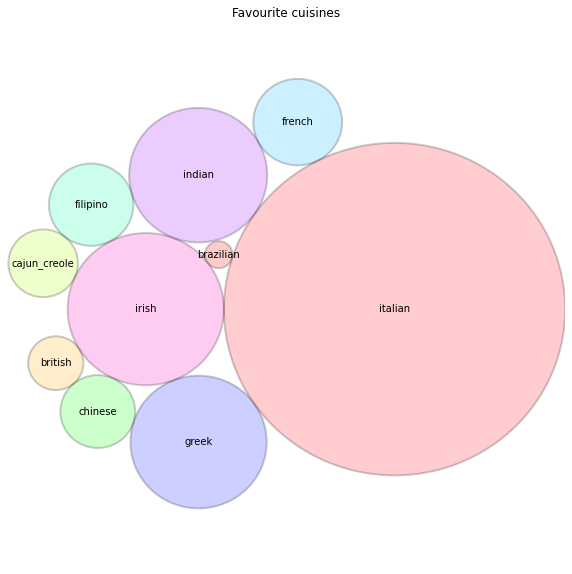

In [139]:
print(df)
import circlify
circles = circlify.circlify(
    df['size'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Favourite cuisines')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df['cuisine']
colors = color2

# print circles
for circle, label, color in zip(circles, labels, colors):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2,facecolor=color, edgecolor="black"))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )

#### The user's preference to Italian and Irish food is seen. On comparing with the recipes data set, we see that the reccomended dishes are based on the user's previous preference influenced by others with an incliniation towards Italian and Irish to see new dishes.

In [141]:
recipes[recipes['id'].isin(reccomendations[reccomendations['user_id'] == sample_user].values[0])]['cuisine']

51839         italian
61177     southern_us
66310          french
80768          french
84420        moroccan
97052           greek
112970    southern_us
121051          irish
141544        italian
184835          irish
186301        italian
Name: cuisine, dtype: object